In [1]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM,Input
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.models import load_model

# Data processing

In [3]:
dataFile = 'XX.mat'
data = scio.loadmat(dataFile)

In [4]:
type(data)

dict

In [6]:
Data = data['XX']

In [7]:
Data.shape

(930, 1050, 3, 29)

In [291]:
# Label1 = np.ceil(Label*100)
Label1 = Label

In [292]:
# plt.plot(Label1/10)

In [293]:
Label_n = (Label1-np.min(Label1))/(np.max(Label1)-np.min(Label1))

In [294]:
Label_n

array([0.53846154, 0.38461538, 0.69230769, ..., 0.38461538, 0.53846154,
       0.69230769])

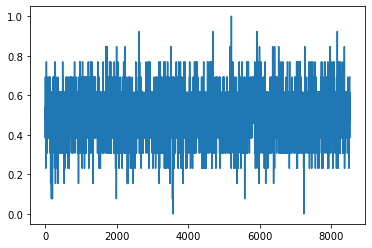

In [295]:
plt.plot(Label_n)

## Data for model traning and testing

In [296]:
Feature_n_T = np.transpose(Feature_n)

In [297]:
Feature_n_T.shape

(8523, 6)

In [298]:
## Data 
ee = 1000

x_train = Feature_n_T[:Feature_n_T.shape[0]-ee,:]
y_train = Label_n[:Feature_n_T.shape[0]-ee]

x_test = Feature_n_T[Feature_n_T.shape[0]-ee:,:]
y_test = Label_n[Feature_n_T.shape[0]-ee:]

In [299]:
x_train.shape

(8023, 6)

In [300]:
y_train.shape

(8023,)

In [301]:
x_test.shape

(500, 6)

In [302]:
y_test.shape

(500,)

## DNNs

In [303]:
# DNN
from keras.layers import Activation, Dense
model= Sequential()
model.add(Dense((16),batch_input_shape=(None,6)))
# model.add(Dense(64, activation='relu'))
model.add(Activation('relu'))
model.add(Dense((16),batch_input_shape=(None,6)))
model.add(Activation('relu'))
model.add(Dense((16),batch_input_shape=(None,6)))
# model.add(Dropout(0.2))
model.add(Dense((1),batch_input_shape=(None,None)))
model.compile(loss = 'mse',optimizer = 'RMSprop',metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 16)                112       
_________________________________________________________________
activation_18 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_19 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 17        
Total params: 673
Trainable params: 673
Non-trainable params: 0
_______________________________________________________

In [304]:
history2 = model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test))

Epoch 1/500
251/251 [==============================] - 2s 2ms/step - loss: 0.0362 - accuracy: 2.3866e-04 - val_loss: 0.0093 - val_accuracy: 0.0000e+00
Epoch 2/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0080 - accuracy: 1.4492e-04 - val_loss: 0.0073 - val_accuracy: 0.0000e+00
Epoch 3/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 5.7820e-04 - val_loss: 0.0062 - val_accuracy: 0.0000e+00
Epoch 4/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 4.0083e-04 - val_loss: 0.0063 - val_accuracy: 0.0000e+00
Epoch 5/500
251/251 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 2.3455e-04 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 6/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 8.6150e-05 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 7/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0063 - accuracy: 

Epoch 55/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0054 - accuracy: 2.4250e-04 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 56/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 5.5855e-04 - val_loss: 0.0056 - val_accuracy: 0.0000e+00
Epoch 57/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 9.0062e-04 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 58/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 4.1764e-04 - val_loss: 0.0060 - val_accuracy: 0.0000e+00
Epoch 59/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 2.7243e-04 - val_loss: 0.0086 - val_accuracy: 0.0000e+00
Epoch 60/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 7.6856e-04 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 61/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0051 - acc

Epoch 109/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 4.5082e-04 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 110/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 3.3402e-04 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 111/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 3.3248e-04 - val_loss: 0.0057 - val_accuracy: 0.0000e+00
Epoch 112/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 3.9338e-04 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 113/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 7.4843e-04 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 114/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 4.5027e-04 - val_loss: 0.0074 - val_accuracy: 0.0000e+00
Epoch 115/500
251/251 [==============================] - 0s 1ms/step - loss: 0.004

251/251 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 4.0625e-04 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 216/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 1.8056e-04 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 217/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 5.3768e-04 - val_loss: 0.0053 - val_accuracy: 0.0000e+00
Epoch 218/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 6.6409e-05 - val_loss: 0.0088 - val_accuracy: 0.0000e+00
Epoch 219/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 5.3818e-04 - val_loss: 0.0071 - val_accuracy: 0.0000e+00
Epoch 220/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 3.9609e-04 - val_loss: 0.0054 - val_accuracy: 0.0000e+00
Epoch 221/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 

251/251 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 4.1275e-04 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 322/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 6.7775e-04 - val_loss: 0.0057 - val_accuracy: 0.0000e+00
Epoch 323/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 3.7418e-04 - val_loss: 0.0074 - val_accuracy: 0.0000e+00
Epoch 324/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 4.3761e-04 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 325/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 3.5451e-04 - val_loss: 0.0068 - val_accuracy: 0.0000e+00
Epoch 326/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 3.4053e-04 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 327/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 

251/251 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.7412e-04 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 428/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 2.9605e-04 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 429/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 6.0860e-04 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 430/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 5.6626e-04 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 431/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 7.5370e-04 - val_loss: 0.0053 - val_accuracy: 0.0000e+00
Epoch 432/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 8.9081e-04 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 433/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 

251/251 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 2.0568e-04 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 481/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 5.0029e-04 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 482/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.7044e-04 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 483/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 2.2325e-04 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 484/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 4.1705e-04 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 485/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 4.7952e-04 - val_loss: 0.0055 - val_accuracy: 0.0000e+00
Epoch 486/500
251/251 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 

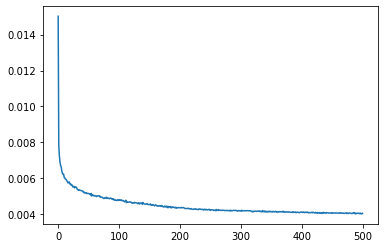

In [320]:
# Loss: convergence or not
plt.plot(history2.history['loss'])
plt.show()

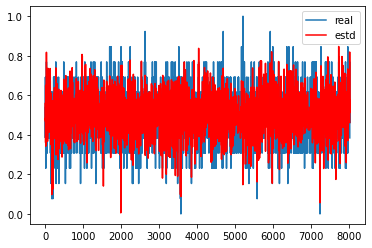

In [321]:
results_d_train = model.predict(x_train)
plt.plot(y_train,label = 'real')
plt.plot(results_d_train,c='r',label = 'estd')
plt.legend()
plt.show()

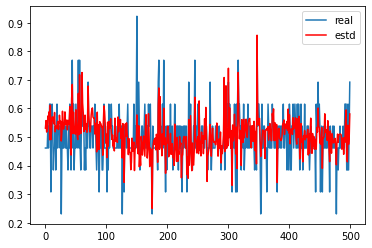

In [322]:
results_d = model.predict(x_test)
plt.plot(y_test,label = 'real')
plt.plot(results_d,c='r',label = 'estd')
plt.legend()
plt.show()

In [323]:
1-np.mean(np.abs((y_test-results_d)/(y_test)))

0.8217527586658776

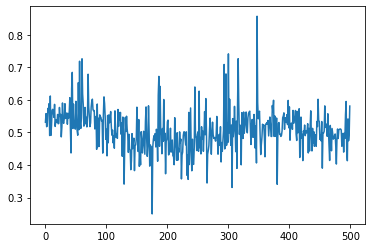

In [324]:
plt.plot(results_d)